# Sin Taxes, reimbursing the government for being unhealthy

Tilburg University

Applied Economic Analysis 1 – MSc Economics

Python Track Final Assignment

Mylonas Vasileios SNR: 2019114

Apostolakis Ioannis SNR: 2015641

### Abstract

The goal of this assignment is to estimate the effect of sin taxes on the reduction of the consumption of products which are categorized as “sin-full” by policymakers. For this purpose, we conducted a Questionnaire research amongst 100 Tilburg University students who recognized themselves as users of these products. We aim to test whether they deal with the increased prices to their “sin-full” good as an extra motivation, thus this policy would make them healthier, by quitting their unhealthy habits, or reveal any different, inspired by this policy, outcomes.


###### Research Question:

How a tax increase in a sin product will affect its consumption? 

###### Motivation:
A sin tax is an excise tax specifically levied on certain goods deemed harmful to society, such as alcohol and tobacco, candies, drugs, soft drinks, fast foods, coffee, sugar, gambling, and pornography. There are two main reasons for a government to impose these taxes. First, to offset the costs sinners impose on others and secondly, to reduce or eliminate sinful behavior __[(Adam J. Hoffer et al. 2014)](https://www.mercatus.org/system/files/introduction.pdf)__. In this assignment, we are trying to figure out on what level this policy is successful in achieving its goals. We want to investigate if the implementation of this taxation policy will reduce the consumption of these products and actually make people healthier, or there are other behavioral mechanisms that will lead consumers to keep their sinful habits. To do that we run small Questionnaire research amongst Tilburg University students. We believe that our project will contribute to the existing literature by giving an insight view of the behavior of the consumers and how they react to tax regulations.


In [20]:
from IPython.display import YouTubeVideo
YouTubeVideo('RcfoAHfIWBk')

###### Literature Review:

Even as early as the 19th century, Scottish economist Adam Smith (1887) wrote that commodities which are not necessary commodities for life but are objects of universal consumption, should be taxed – namely sugar, tobacco and rum. Historically, countries all over the world have collected sin taxes in one form or the other. Other countries such as Sweden, Canada, and Philippines have sin tax for tobacco and while Great Britain is pondering on sugar taxes given its exploding health care revenue. Taxes are imposed on cigarettes and other commodities viewed as health-risks  (__[Gruber, J. and Kőszegi, 2004](https://www.google.com/search?q=Gruber%2C+J.+and+K%C5%91szegi%2C+2004&oq=Gruber%2C+J.+and+K%C5%91szegi%2C+2004&aqs=chrome..69i57.432j0j4&sourceid=chrome&ie=UTF-8)__)   by governments. Sin Taxes should be viewed as corrective taxes and imposed to generate revenue or subsidies which can then be used for other causes such as greener or energy efficient products, which see low consumption, such as greener or energy efficient products. In contrast to the intentions of the governments, researchers have found that these taxes are regressive. As most of these “sin” commodities, are consumed mainly by low-income demographics, while the consumers of green-energy commodities are mostly high-income. Thus, governments are caught between motives of ‘redistribution’ and ‘corrective’ motives. 
In Philippines, research by (__[Jowett, M. and Hsiao, 2007](https://www.researchgate.net/publication/23314798_Underutilization_of_Social_Insurance_among_the_Poor_Evidence_from_the_Philippines)__)  establishes the effectiveness of the ‘sin tax’ imposed in 2012. They found that there was significant drop in the number of smokers in the country. This was an important step forward in more ways than just the governmental revenue, that was used to improve health care as well as the national health insurance program, it also aided in the decrease of smoking to the statistically the 15th largest market for cigarettes (in 2010), with one of the strongest cartels for tobacco in Asia. The strategies adopted by the Philippines’ government constitute an instructive example to countries exploring the possibilities of sin taxation, aiming to achieve health objectives. This sin-taxing program campaign exceeded the initial estimation by over 114% in the year of implementation. However, despite the influx of massive sin tax revenue, the projected levels of healthcare services were not possible to achieve. Some of the reasons were the bridled-nature of organizational goals at the Philippine Department of Health, the facilities that could not be improved at the same pace that revenue was drawn, while, there was difficulty in absorbing the new revenues, thus mitigating the impact of sin tax.


###### Method:

In order to investigate the impact of taxation in the consumption of sinful products we run a questionnaire research amongst 100 Tilburg University students who recognized themselves as users of these products. We create two questionnaires, one for treatment group and one for control group. Each group had 50 participants who were randomly selected. The two questionnaires were identical for both groups, except the last question. The first three questions in both questionnaires were asking the participants about general information (Gender, Age and International or not) while the forth question was asking them which sin product they consume. The last question differed between the treatment and control group. The question in the treatment group was “If there was a tax policy increasing the price of this product by 10% how much would you spend to consume it?” while in the control group was “How much do you spend monthly to consume this product?”. The purpose of this research is to investigate if an increase of the tax in these products will have any effect on the consumption. The answers of the rest of questions (1, 2, 3) will be used as covariates. Both questionnaires can be found in [Appendix](#Appendix:).

Firstly, we will import our collected data. After we will conduct explanatory data analysis and create a Distribution value graph as also two histograms, one for each group. To investigate the effect of the tax on consumption we will do an OLS regression using as dependent variable the answers of participants in the last question and as indipendent variable a dummy variable which takes the value of 0 if the participant belongs to the control group and 1 if the participant belongs to the treatment group. As a next step, to have a better view, we will make another OLS regression adding also variable referring to gender, age and if the participant is international or not as covariates. In the end we will perform a t-test to examine if the two groups are statistical different. Then we will reach our [Conclusion](#Answer).  

###### Assumptions and Limitations: 

The assumptions we had to function under was the ability of the subjects to think of themselves correctly as heavy users and not overestimate their usage frequency, of the products in question.

Heavy users, whose demand for cigarettes and alcohol is relatively inelastic. A heavy smoker or an alcoholic is unlikely to reduce consumption because of a price rise, making sin taxes an unreliable way of reducing consumption or improving public health.


###### Hypotheses:

H0: The consumption of sin products will not be reduced

H1: The consumption of sin products will be reduced

###### Importing libraries and data

In [1]:
import pandas as pd
import csv
from sklearn import datasets, linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


Here we will import the data that we have collected from the questionnaires. Columns represent the variables and the rows represent the participants. Treatment variable take the value of 1 if the participant belongs to the treatment group, 0 otherwise. Gender variable indicates whether the participant is male (1) or female (0). International variable is 1 for being international and 0 for being Dutch. Furthermore, Age is 1 for being younger than 22 and 0 for being older than 22. Y is our dependent variable which provides information on how much each participant is spending to consume a sin product each month.

In [2]:
path = 'data1.csv'
ctr = pd.read_csv(path)
ctr

,Treatment,Gender,Internationa,Age,Y
0,0,1,1,0,120
1,0,1,0,1,80
2,0,0,1,0,95
3,0,1,1,0,60
4,0,0,1,1,100
5,0,0,1,0,50
6,0,1,0,1,200
7,0,0,1,1,50
8,0,0,0,1,75
9,0,1,0,0,70


We can see that our data consists of 100 rows and 5 columns.

###### Descriptive Statistics

In this section we will do descriptive statistics for the whole sample of data, as well as for the treatment and control group.

In [3]:
df = pd.DataFrame(data = ctr)
data = df.values
y = df['Y'].describe()
y = pd.DataFrame(data = y)
y

,Y
count,100.000000
mean,66.300000
std,30.223243
min,0.000000
25%,48.750000
50%,65.000000
75%,85.000000
max,200.000000


We can see here that the mean is 66.3, the stadar deviation is 30.2, the min value of our sample is 0 while the max value is 200.

We are doing the same for the control and treatment group.

In [4]:
tmp = df.values
Control = tmp[0:50,4]
Control = pd.DataFrame(data = Control)
Total1 = Control.describe()
Total1.columns = ['Control']
Total1

,Control
count,50.000000
mean,72.800000
std,31.268423
min,20.000000
25%,51.250000
50%,70.000000
75%,90.000000
max,200.000000


In [5]:
Treatment = tmp[50:100,4]
Treatment = pd.DataFrame(data = Treatment)
Total2 = Treatment.describe()
Total2.columns = ['Treatment']
Total2

,Treatment
count,50.000000
mean,59.800000
std,27.956964
min,0.000000
25%,40.000000
50%,60.000000
75%,80.000000
max,120.000000


From the descriptive statistics we can already observe a decrease in the mean values of Y in the treatment group compared to the control group.  

Now we will construct two histograms, one for each group to give a rough sense of the density of the underlying distribution of the data. Firstly we will make the histogram for the control group and after for the treatment group.

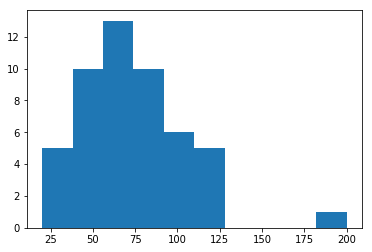

In [6]:
plt.hist(Control)
plt.show()

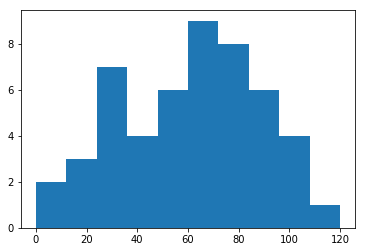

In [7]:
plt.hist(Treatment)
plt.show()

We see that the histogram for the control group is look like Symmetric while for the treatment group is Multimodal.

###### Distribution value graph

Here we create a distribution value graph. The blue triangles represent the amount of money that each participant spends for his sinful habit every month in control group, while the red dots in treatment group.

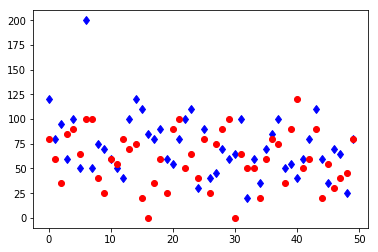

In [8]:
plt.plot(Control ,'d',color = 'b')
plt.plot(Treatment ,'o',color = 'r')
plt.show()

We can see that there is a slightly decrease in money that participants in treatment group are willing to pay to consume their sinful products comparing to the control group.

###### OLS Regression

Now we will run an OLS regression to estimate the effect of the treatment dummy on the outcome.

In [11]:
X = data [:,0]
X = X[:, None]
y = data[:,4]
X.astype('int64')
y.astype('int64')
reg =  linear_model.LinearRegression().fit(X,y)

In [12]:
tmp1 = sm.add_constant(X)
models = sm.OLS(y,tmp1)
result = models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.803
Date:                Thu, 31 Jan 2019   Prob (F-statistic):             0.0308
Time:                        03:23:41   Log-Likelihood:                -479.86
No. Observations:                 100   AIC:                             963.7
Df Residuals:                      98   BIC:                             968.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8000      4.194     17.356      0.0

As we can see the coefficient of X1, where X1 is the treatment dummy (1 for treatment group, 0 otherwise), is -13, meaning that the average spending difference on consumption of sinful products between the treatment and control group is 13 Euro less every month. Our result is statistical significant in 95% confidence interval. We also see that the R-squared is very low but this may not be a problem as we try to explain human behavior.

Now we include three more variables as covariates. X2 is Gender (1 for male, 0 otherwise), X3 is International student (1 for being international, 0 otherwise) and X4 is Age (1 for being younger than 22, 0 otherwise)

In [16]:
X = data [:,0:4]
X.astype('int64')
reg =  linear_model.LinearRegression().fit(X,y)
tmp1 = sm.add_constant(X)
models = sm.OLS(y,tmp1)
result = models.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.698
Date:                Thu, 31 Jan 2019   Prob (F-statistic):              0.157
Time:                        03:24:30   Log-Likelihood:                -478.80
No. Observations:                 100   AIC:                             967.6
Df Residuals:                      95   BIC:                             980.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.4472      6.706     10.654      0.0

We can see the coefficient of X1 now is even lower ,-13.46, meaning that the average spending difference on consumption of sinful products between the treatment and control group is 13.46 Euro less every month. Our result is statistical significant in 95% confidence interval.

###### T-Test

Now we conduct a T-test to check if there is a significant difference between the means of two groups which may be related in certain features in 95% condidence interval.

In [17]:
stats.ttest_ind(Control,Treatment)

Ttest_indResult(statistic=array([2.19158161]), pvalue=array([0.03077853]))

We se that the p-value is 0.031 in two sided t-test. So, p-value/2 is lower than 0.05. Assuming a null hypothesis that the two means are equal we can reject the null hypothesis indicating that data readings are strong and are not by chance.

###### Answer

Our results showed that, when there is an increase in the tax in sinful products of 10%, then consumers are willing to pay less to consume them, meaning that, there will be a decrease in the consumption of these products. While our results were statistical significant, our model do not explain much of the variability of the response data around its mean. Based on our results we are able to reject the [null hypothesis](#Hypotheses:) that the consumption of sin products will not be reduced.To conclude, the answer to the [researh question](#Research-Question:) is that there is a decrease in the consumption of sinful products when there is an aggressive tax policy implementantion, but this decrease is not very big to believe that these taxes achieve their goals and also it may be caused by other factors that we could not observe. To better understand whether and at which level taxes on sin products are able to reduce the consumption of these products and make the people healthier, further research is needed in bigger sample.

### Appendix:

#### Treatmeant Group Questionnaire

###### Gender:


О Male

О Female

###### Age:


О Younger than 22

О Older than 22

###### International or Dutch:


О International

О Dutch

###### I am a heavy user of:


О Smoke

О Alcohol

О Marijuana

О Fast food

###### If there was a tax policy increasing the price of this product by 10% how much would you spend to consume it?

___________________________________________________

#### Control Group Questionnaire

###### Gender:


О Male

О Female

###### Age:


О Younger than 22

О Older than 22

###### International or Dutch:


О International

О Dutch

###### I am a heavy user of:


О Smoke

О Alcohol

О Marijuana

О Fast food

###### How much do you spend monthly to consume this product?

___________________________________________________

[Back](#Sin-Taxes,-reimbursing-the-government-for-being-unhealthy)